## **Google Drive 마운트**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
base_path = '/content/drive/MyDrive/DCT_loss_train'
os.chdir(base_path)

In [ ]:
!pwd

/content/drive/MyDrive/DCT_loss_train


## **라이브러리 import**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## **파일 import**

In [ ]:
with open('dctface_loss_log_train.txt', 'r') as f:
    lines = f.readlines()

In [ ]:
print('전체 문장 길이 :', len(lines))
print('lines 타입 :', type(lines))
print()
lines[0:10]

전체 문장 길이 : 3360
lines 타입 : <class 'list'>



['================ Training Loss (Tue Sep 20 19:24:00 2022) =================\n',
 '(epoch: 1\t iters: 0\t time: 8.82683)\ttime: 8.82683\tlr: 0.00020\tg_loss_surface: 0.00000\tg_loss_texture: 0.00000\tcontent_loss: 0.32840\ttvloss: 0.00000\texploss: 0.00000\ttotal_loss: 0.32840\traw_exp_loss: 0.00274\td_acc_surface_real: 0.00000\td_acc_surface_fake: 1.00000\td_acc_texture_real: 0.00000\td_acc_texture_fake: 1.00000\t\n',
 '(epoch: 1\t iters: 20\t time: 1.75147)\ttime: 1.75147\tlr: 0.00020\tg_loss_surface: 0.00000\tg_loss_texture: 0.00000\tcontent_loss: 0.30549\ttvloss: 0.00002\texploss: 0.00000\ttotal_loss: 0.30551\traw_exp_loss: 0.00140\td_acc_surface_real: 0.68761\td_acc_surface_fake: 0.99517\td_acc_texture_real: 0.67740\td_acc_texture_fake: 0.99828\t\n',
 '(epoch: 1\t iters: 40\t time: 1.75540)\ttime: 1.75540\tlr: 0.00020\tg_loss_surface: 0.00000\tg_loss_texture: 0.00000\tcontent_loss: 0.25527\ttvloss: 0.00015\texploss: 0.00000\ttotal_loss: 0.25542\traw_exp_loss: 0.00124\td_acc_surfa

## **Data Parsing**

In [ ]:
eval_names = ['g_loss_surface', 'g_loss_texture', 
             'content_loss', 'tvloss', 'exploss', 
             'total_loss', 'raw_exp_loss', 
             'd_acc_surface_real', 'd_acc_surface_fake', 
             'd_acc_texture_real', 'd_acc_texture_fake']

# eval_names = ['g_loss_surface', 'g_loss_texture', 
#              'content_loss', 'tvloss', 'exploss', 
#              'total_loss', 'raw_exp_loss', 
#              'd_surface_real', 'd_surface_fake', 
#              'd_texture_real', 'd_texture_fake']

In [ ]:
# val_log.txt 파일을 불러와서 pandas DataFrame으로 변환하는 함수
def txt_to_dataframe(lines, eval_names):

    eval_dict = {}

    for k, line in enumerate(lines):

        for i, name in enumerate(eval_names):
            
            val_list = val_extractor(line, eval_names)

            if val_list == []:
                continue

            if name not in eval_dict.keys():
                eval_dict[name] = []
            eval_dict[name].append(val_list[i])
    
    df = pd.DataFrame(data = eval_dict, dtype = np.float32)
    df['iters'] = np.arange(len(df))*20
    
    return df

# 텍스트 파일에서 eval_names에 정의된 loss값 추출해주는 함수
def val_extractor(line, eval_names):

    val_list = []

    for word in eval_names:

        word_len = len(word)
        sidx = line.find(word)
        
        if sidx > 0: 
            val_sidx = sidx + word_len + 2
            val = float(line[val_sidx : val_sidx + 7])

            val_list.append(val)
        else:
            continue

    return val_list

In [ ]:
df = txt_to_dataframe(lines, eval_names)

In [ ]:
print('df 길이 :', len(df))

df

df 길이 : 3354


,g_loss_surface,g_loss_texture,content_loss,tvloss,exploss,total_loss,raw_exp_loss,d_acc_surface_real,d_acc_surface_fake,d_acc_texture_real,d_acc_texture_fake,iters
0,0.00000,0.00000,0.32840,0.00000,0.00000,0.32840,0.00274,0.00000,1.00000,0.00000,1.00000,0
1,0.00000,0.00000,0.30549,0.00002,0.00000,0.30551,0.00140,0.68761,0.99517,0.67740,0.99828,20
2,0.00000,0.00000,0.25527,0.00015,0.00000,0.25542,0.00124,0.88302,0.97249,0.87966,0.93616,40
3,0.00000,0.00000,0.20867,0.00039,0.00000,0.20906,0.00123,0.79256,0.84582,0.83437,0.91410,60
4,0.00000,0.00000,0.18568,0.00054,0.00000,0.18622,0.00111,0.80680,0.81679,0.79928,0.92749,80
...,...,...,...,...,...,...,...,...,...,...,...,...
3349,1.03968,0.26582,0.20264,0.00570,0.01171,1.52555,0.00117,0.48426,0.59747,0.52995,0.60426,66980
3350,1.03271,0.26559,0.20180,0.00562,0.01239,1.51810,0.00124,0.50099,0.58214,0.51793,0.62264,67000
3351,1.04070,0.26807,0.20169,0.00575,0.01285,1.52905,0.00128,0.48721,0.58656,0.51556,0.60582,67020
3352,1.03801,0.26515,0.20449,0.00584,0.01109,1.52457,0.00111,0.49967,0.58548,0.53226,0.58859,67040


In [ ]:
df.index[2000:2500]

RangeIndex(start=2000, stop=2500, step=1)

In [ ]:
df = df.drop(df.index[2000:2500], axis=0)

In [ ]:
df = df.reset_index()

In [ ]:
print('df 길이 :', len(df))

df

df 길이 : 2854


,index,g_loss_surface,g_loss_texture,content_loss,tvloss,exploss,total_loss,raw_exp_loss,d_acc_surface_real,d_acc_surface_fake,d_acc_texture_real,d_acc_texture_fake,iters
0,0,0.00000,0.00000,0.32840,0.00000,0.00000,0.32840,0.00274,0.00000,1.00000,0.00000,1.00000,0
1,1,0.00000,0.00000,0.30549,0.00002,0.00000,0.30551,0.00140,0.68761,0.99517,0.67740,0.99828,20
2,2,0.00000,0.00000,0.25527,0.00015,0.00000,0.25542,0.00124,0.88302,0.97249,0.87966,0.93616,40
3,3,0.00000,0.00000,0.20867,0.00039,0.00000,0.20906,0.00123,0.79256,0.84582,0.83437,0.91410,60
4,4,0.00000,0.00000,0.18568,0.00054,0.00000,0.18622,0.00111,0.80680,0.81679,0.79928,0.92749,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,3349,1.03968,0.26582,0.20264,0.00570,0.01171,1.52555,0.00117,0.48426,0.59747,0.52995,0.60426,56980
2850,3350,1.03271,0.26559,0.20180,0.00562,0.01239,1.51810,0.00124,0.50099,0.58214,0.51793,0.62264,57000
2851,3351,1.04070,0.26807,0.20169,0.00575,0.01285,1.52905,0.00128,0.48721,0.58656,0.51556,0.60582,57020
2852,3352,1.03801,0.26515,0.20449,0.00584,0.01109,1.52457,0.00111,0.49967,0.58548,0.53226,0.58859,57040


In [ ]:
df.drop(['iters'], axis=1)

,index,g_loss_surface,g_loss_texture,content_loss,tvloss,exploss,total_loss,raw_exp_loss,d_acc_surface_real,d_acc_surface_fake,d_acc_texture_real,d_acc_texture_fake
0,0,0.00000,0.00000,0.32840,0.00000,0.00000,0.32840,0.00274,0.00000,1.00000,0.00000,1.00000
1,1,0.00000,0.00000,0.30549,0.00002,0.00000,0.30551,0.00140,0.68761,0.99517,0.67740,0.99828
2,2,0.00000,0.00000,0.25527,0.00015,0.00000,0.25542,0.00124,0.88302,0.97249,0.87966,0.93616
3,3,0.00000,0.00000,0.20867,0.00039,0.00000,0.20906,0.00123,0.79256,0.84582,0.83437,0.91410
4,4,0.00000,0.00000,0.18568,0.00054,0.00000,0.18622,0.00111,0.80680,0.81679,0.79928,0.92749
...,...,...,...,...,...,...,...,...,...,...,...,...
2849,3349,1.03968,0.26582,0.20264,0.00570,0.01171,1.52555,0.00117,0.48426,0.59747,0.52995,0.60426
2850,3350,1.03271,0.26559,0.20180,0.00562,0.01239,1.51810,0.00124,0.50099,0.58214,0.51793,0.62264
2851,3351,1.04070,0.26807,0.20169,0.00575,0.01285,1.52905,0.00128,0.48721,0.58656,0.51556,0.60582
2852,3352,1.03801,0.26515,0.20449,0.00584,0.01109,1.52457,0.00111,0.49967,0.58548,0.53226,0.58859


In [ ]:
df['iters'] = np.arange(len(df))*20

In [ ]:
print('df 길이 :', len(df))

df

df 길이 : 2854


,index,g_loss_surface,g_loss_texture,content_loss,tvloss,exploss,total_loss,raw_exp_loss,d_acc_surface_real,d_acc_surface_fake,d_acc_texture_real,d_acc_texture_fake,iters
0,0,0.00000,0.00000,0.32840,0.00000,0.00000,0.32840,0.00274,0.00000,1.00000,0.00000,1.00000,0
1,1,0.00000,0.00000,0.30549,0.00002,0.00000,0.30551,0.00140,0.68761,0.99517,0.67740,0.99828,20
2,2,0.00000,0.00000,0.25527,0.00015,0.00000,0.25542,0.00124,0.88302,0.97249,0.87966,0.93616,40
3,3,0.00000,0.00000,0.20867,0.00039,0.00000,0.20906,0.00123,0.79256,0.84582,0.83437,0.91410,60
4,4,0.00000,0.00000,0.18568,0.00054,0.00000,0.18622,0.00111,0.80680,0.81679,0.79928,0.92749,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,3349,1.03968,0.26582,0.20264,0.00570,0.01171,1.52555,0.00117,0.48426,0.59747,0.52995,0.60426,56980
2850,3350,1.03271,0.26559,0.20180,0.00562,0.01239,1.51810,0.00124,0.50099,0.58214,0.51793,0.62264,57000
2851,3351,1.04070,0.26807,0.20169,0.00575,0.01285,1.52905,0.00128,0.48721,0.58656,0.51556,0.60582,57020
2852,3352,1.03801,0.26515,0.20449,0.00584,0.01109,1.52457,0.00111,0.49967,0.58548,0.53226,0.58859,57040


## **Data 시각화**

In [ ]:
def plot_TTN_loss(df, list_loss_name, sf = 0.4, span=10, leverage = 10, y_lim=True, marker=None, linestyle=None, linewidth=None, color=None): # type(linestyle) = str  / type(linewidth) = int  / type(color) = str

    fig_len = len(list_loss_name)

    figsize = (20, 10*fig_len)

    plt.figure(figsize=figsize)

    for i, loss_name in enumerate(list_loss_name):

        loss_ema = df[loss_name].ewm(alpha=sf, adjust=True).mean()

        plt.subplot(fig_len,1,i+1)
        plt.plot(df['iters'], df[loss_name], linestyle=':', linewidth=1.5, color='gray', marker=None, label='Loss Values')
        plt.plot(df['iters'], loss_ema, linestyle=linestyle, linewidth=linewidth, color=color, marker=None, label='EWMA Values')
        plt.grid(which='major')
        plt.xlabel('iters', fontsize=24, fontweight='bold')
        plt.ylabel(loss_name, fontsize=24, fontweight='bold')
        plt.xticks(ticks=None, fontsize=20, fontweight='bold')
        plt.yticks(ticks=None, fontsize=20, fontweight='bold')
        plt.title(label=loss_name, fontsize=30, fontweight='bold')
        plt.legend(loc='best', prop={'size': 20})
        # plt.legend(loc='center left')

        if y_lim:
            y_3q = df[loss_name].quantile(0.75)
            y_1q = df[loss_name].quantile(0.25)
            IQR = y_3q - y_1q

            y_ut = y_3q + IQR * leverage
            y_lt = y_1q - IQR * leverage

            print('{: .2f}, {: .2f}'.format(y_ut, y_lt))

            plt.ylim([y_lt, y_ut])

    return

In [ ]:
eval_names = ['g_loss_surface', 'g_loss_texture', 
             'content_loss', 'tvloss', 'exploss', 
             'total_loss', 'raw_exp_loss', 
             'd_acc_surface_real', 'd_acc_surface_fake', 
             'd_acc_texture_real', 'd_acc_texture_fake']

# eval_names = ['g_loss_surface', 'g_loss_texture', 
#              'content_loss', 'tvloss', 'exploss', 
#              'total_loss', 'raw_exp_loss', 
#              'd_surface_real', 'd_surface_fake', 
#              'd_texture_real', 'd_texture_fake']

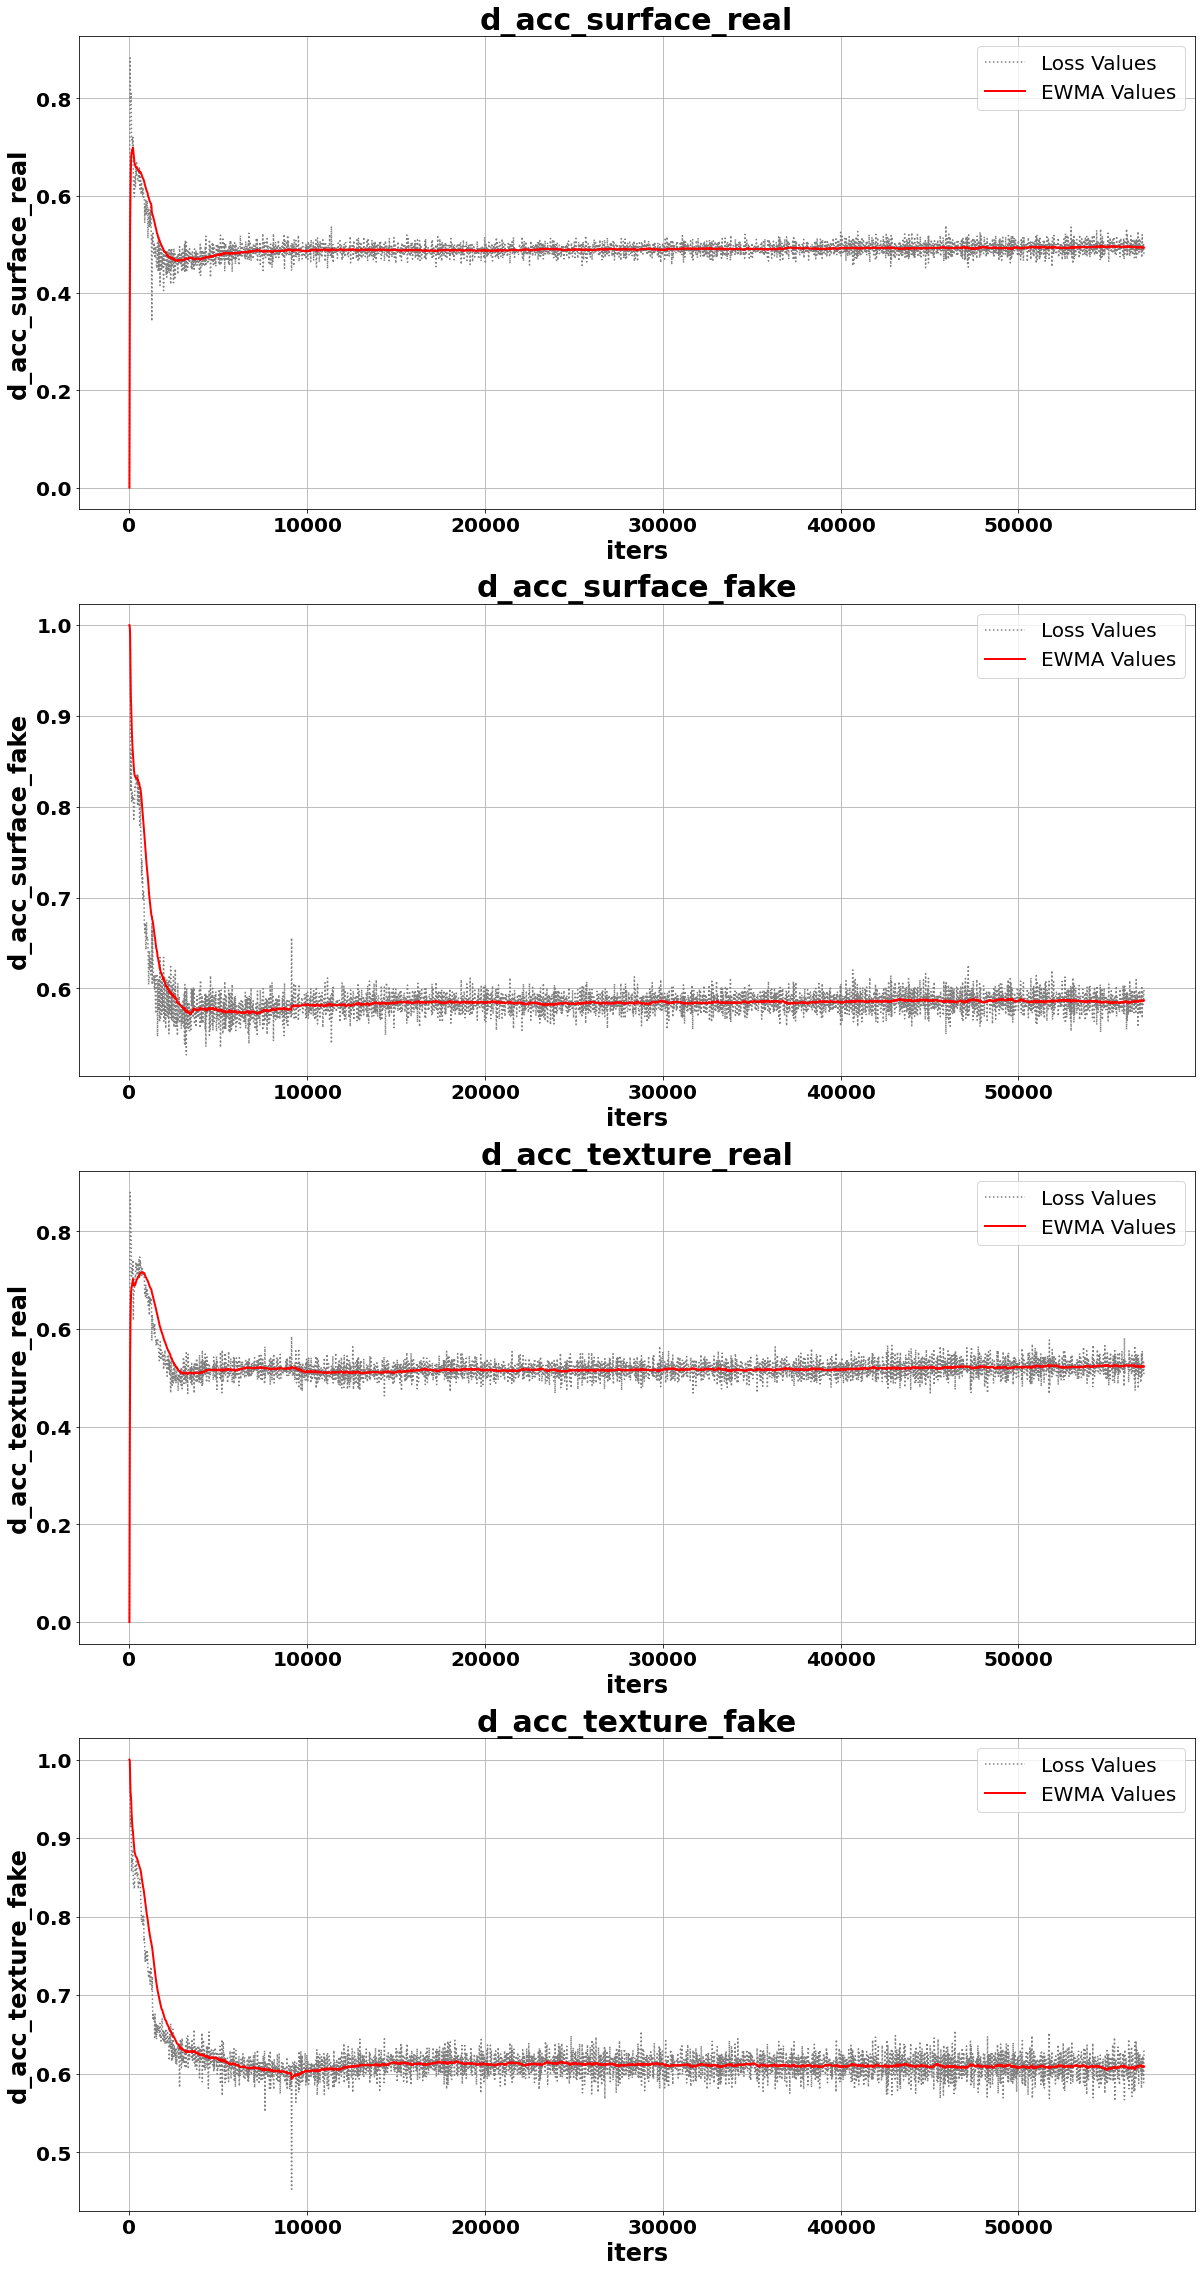

In [ ]:
list_loss_name = ['d_acc_surface_real', 'd_acc_surface_fake', 'd_acc_texture_real', 'd_acc_texture_fake']
# list_loss_name = ['total_loss']

plot_TTN_loss(df, list_loss_name, sf = 0.05, span=10, leverage = 10, y_lim=False, marker=None, linestyle='-', linewidth=2, color='red')

 0.59,  0.39
 0.67,  0.49
 0.66,  0.38
 0.72,  0.50


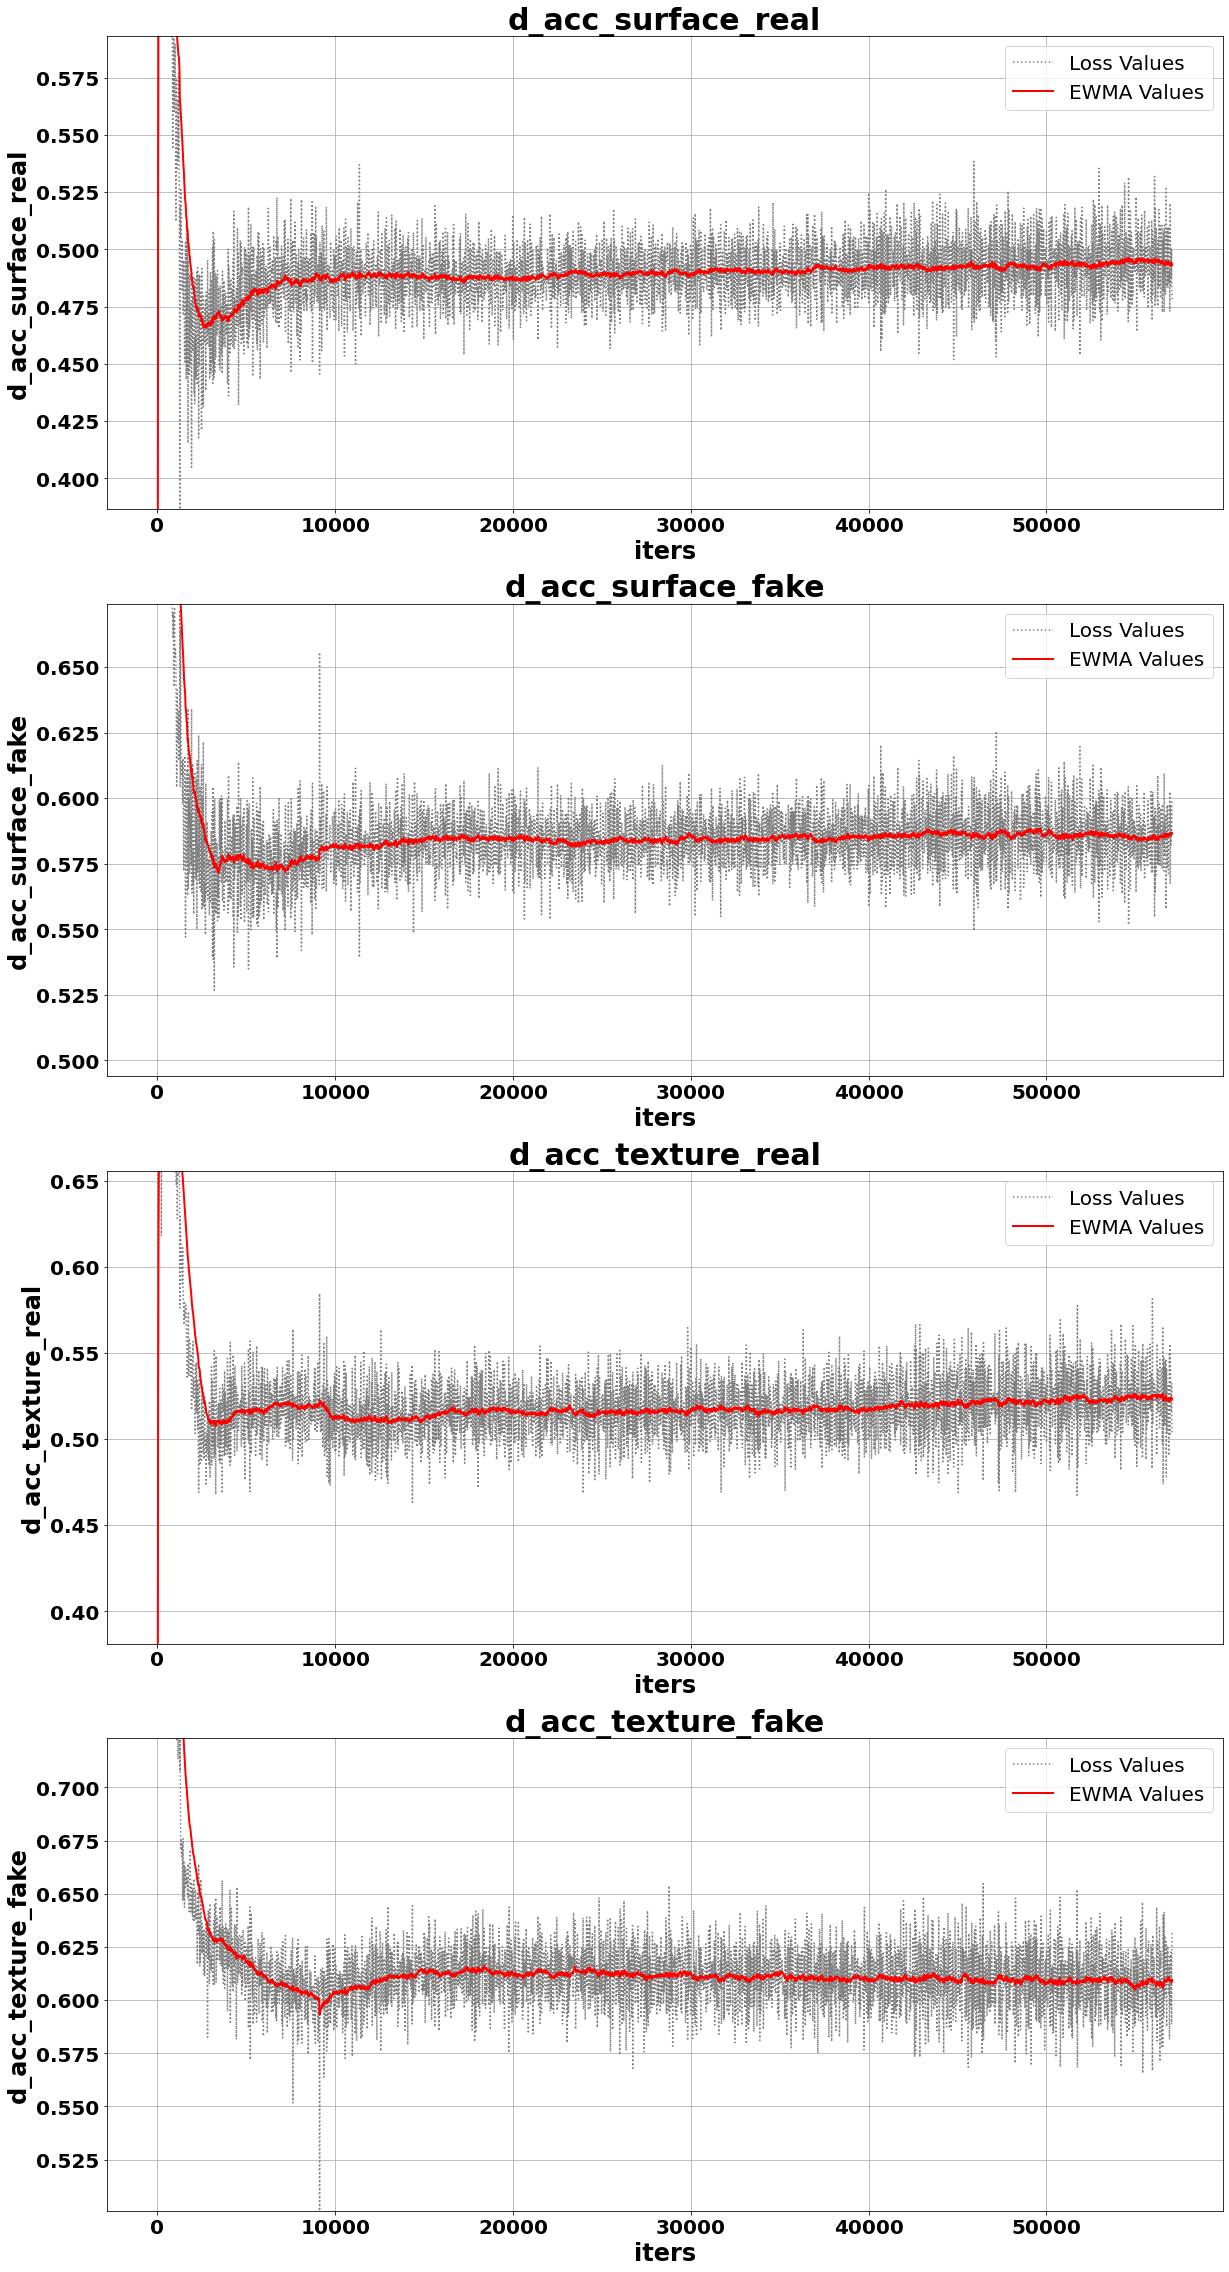

In [ ]:
plot_TTN_loss(df, list_loss_name, sf = 0.05, span=10, leverage = 5, y_lim=True, marker=None, linestyle='-', linewidth=2, color='red')